# Health Index
### Code & Cry

1. Poverty 
2. Asthma 
3. Pollution Burden
4. Low Birth Weight
5. Cardiovascular Disease

[Insert reason why we're using indices]. We will be using the above five indicators and scoring them between 1 and 4. We will then sum the five indicators to define the overarching Health Index, which will have a total of 20 possible points. Higher scores ([**later find the quantiles of each fips code, and insert the top quantile for the scores**]) indicate higher health and environmental vulnerabilities, whereas lower scores ([**same as higher scores**]) indicate lower vulnerabilities. 

In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [2]:
#pull in dataset 
health = pd.read_csv('data/sf_health.csv')

In [3]:
#confirm that data was imported correctly
health.head()

,FIPS,Total_Population,ZIP,Longitude,Latitude,Pollution_Burden,Pollution_Burden_Pctl,Asthma,Asthma_Pctl,Low_Birth_Weight,Low_Birth_Weight_Pctl,Cardiovascular_Disease,Cardiovascular_Disease_Pctl,Poverty,Poverty_Pctl
0,6.075023e+09,3972.0,94124.0,-122.386139,37.727755,58.23,88.31,123.98,96.44,8.09,96.82,11.96,45.80,27.3,49.12
1,6.075018e+09,3008.0,94130.0,-122.419701,37.861948,58.31,88.51,106.14,94.28,8.59,98.20,7.42,9.73,66.7,95.90
2,6.075023e+09,2890.0,94124.0,-122.375965,37.735632,54.77,81.89,123.98,96.44,7.74,95.32,11.96,45.80,71.7,97.95
3,6.075023e+09,5398.0,94124.0,-122.401760,37.735192,54.39,81.12,123.98,96.44,6.41,82.28,11.96,45.80,30.7,54.95
4,6.075023e+09,3661.0,94124.0,-122.390088,37.721593,54.06,80.44,123.98,96.44,6.29,80.16,11.96,45.80,40.1,69.35


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040735 entries, 0 to 1040734
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS                         195 non-null    float64
 1   Total_Population             195 non-null    float64
 2   ZIP                          195 non-null    float64
 3   Longitude                    195 non-null    float64
 4   Latitude                     195 non-null    float64
 5   Pollution_Burden             195 non-null    float64
 6   Pollution_Burden_Pctl        195 non-null    float64
 7   Asthma                       195 non-null    float64
 8   Asthma_Pctl                  195 non-null    float64
 9   Low_Birth_Weight             191 non-null    float64
 10  Low_Birth_Weight_Pctl        191 non-null    float64
 11  Cardiovascular_Disease       195 non-null    float64
 12  Cardiovascular_Disease_Pctl  195 non-null    float64
 13  Poverty     

In [5]:
#FIPS code is currently a float and needs to be changed into a string for merging later on
health = pd.read_csv(
    'data/sf_health.csv',
    dtype=
    {
        'FIPS':str
    }
)
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040735 entries, 0 to 1040734
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS                         195 non-null    object 
 1   Total_Population             195 non-null    float64
 2   ZIP                          195 non-null    float64
 3   Longitude                    195 non-null    float64
 4   Latitude                     195 non-null    float64
 5   Pollution_Burden             195 non-null    float64
 6   Pollution_Burden_Pctl        195 non-null    float64
 7   Asthma                       195 non-null    float64
 8   Asthma_Pctl                  195 non-null    float64
 9   Low_Birth_Weight             191 non-null    float64
 10  Low_Birth_Weight_Pctl        191 non-null    float64
 11  Cardiovascular_Disease       195 non-null    float64
 12  Cardiovascular_Disease_Pctl  195 non-null    float64
 13  Poverty     

In [6]:
#FIPS code needs the leading 0 to merge with shapefile 
health['FIPS'] = health['FIPS'].str.replace('6075', '06075')
health.head()

,FIPS,Total_Population,ZIP,Longitude,Latitude,Pollution_Burden,Pollution_Burden_Pctl,Asthma,Asthma_Pctl,Low_Birth_Weight,Low_Birth_Weight_Pctl,Cardiovascular_Disease,Cardiovascular_Disease_Pctl,Poverty,Poverty_Pctl
0,06075023200,3972.0,94124.0,-122.386139,37.727755,58.23,88.31,123.98,96.44,8.09,96.82,11.96,45.80,27.3,49.12
1,06075017902,3008.0,94130.0,-122.419701,37.861948,58.31,88.51,106.14,94.28,8.59,98.20,7.42,9.73,66.7,95.90
2,06075023103,2890.0,94124.0,-122.375965,37.735632,54.77,81.89,123.98,96.44,7.74,95.32,11.96,45.80,71.7,97.95
3,06075023001,5398.0,94124.0,-122.401760,37.735192,54.39,81.12,123.98,96.44,6.41,82.28,11.96,45.80,30.7,54.95
4,06075023400,3661.0,94124.0,-122.390088,37.721593,54.06,80.44,123.98,96.44,6.29,80.16,11.96,45.80,40.1,69.35


## 1. Poverty
[insert description]

In [13]:
#define columns to keep for poverty index
columns_to_keep=['FIPS',
                 'Poverty',
                 'Poverty_Pctl',]

In [14]:
#add it to the poverty dataframe
poverty=health[columns_to_keep]
poverty.head()

,FIPS,Poverty,Poverty_Pctl
0,06075023200,27.3,49.12
1,06075017902,66.7,95.90
2,06075023103,71.7,97.95
3,06075023001,30.7,54.95
4,06075023400,40.1,69.35


In [18]:
#identify quantiles for index
poverty.Poverty.describe()

count    193.000000
mean      21.955959
std       13.993673
min        3.300000
25%       12.500000
50%       18.000000
75%       27.300000
max       71.700000
Name: Poverty, dtype: float64

### Defining Quantiles 
• **Quantile 1** = census tract with poverty values less than 12.5

• **Quantile 2** = census tract with poverty values between 12.5 and 18.0

• **Quantile 3** = census tract with poverty values between 18.0 and 27.3

• **Quantile 4** = census tract with poverty values above 27.3

Q1 has the least rates of poverty, whereas Q4 has the highest rates of poverty. 

In [21]:
#query the census tracts in the fourth quantile only 
poverty[poverty.Poverty>27.3].count()

FIPS            48
Poverty         48
Poverty_Pctl    48
dtype: int64

# now that we confirmed that there are 48 census tracts with a score of 4 in the Poverty Index, let's define the all the census tracts within their respective scores
poverty_1=poverty[poverty.Poverty<12.5]
poverty_2=poverty[poverty['Poverty'].between(12.5, 18.0)]
poverty_3=poverty[poverty['Poverty'].between(18.0, 27.3)]
poverty_4=poverty[poverty.Poverty>27.3]

In [33]:
### Plot

<AxesSubplot: ylabel='Frequency'>

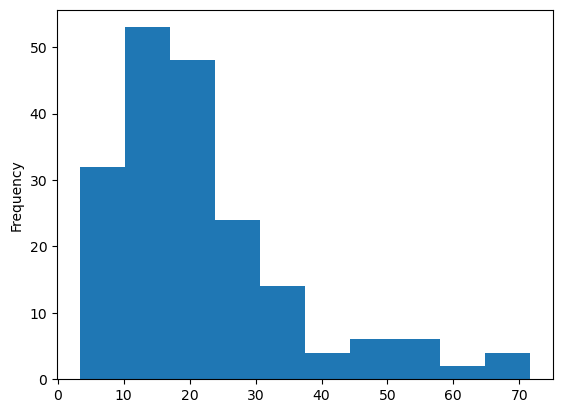

In [35]:
#histogram with 10 bins
poverty['Poverty'].plot.hist(bins=10)

Since the 50th percentile is at 18.0, it makes sense that this is a right skewed histogram. 

In [42]:
# bring in maps to map on the poverty index
poverty_tracts=gpd.read_file('data/SF2010_Neighborhoods_CTs.geojson')
poverty_tracts.head()

,shape_area,nhood,tractce10,geoid,shape_len,geometry
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341..."
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234..."
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244..."
3,3364564.73418,Japantown,015500,06075015500,12144.0167608,"MULTIPOLYGON (((-122.42469 37.78534, -122.4249..."
4,2515362.5151,Pacific Heights,015300,06075015300,6918.26802571,"MULTIPOLYGON (((-122.43492 37.78588, -122.4365..."


<AxesSubplot: >

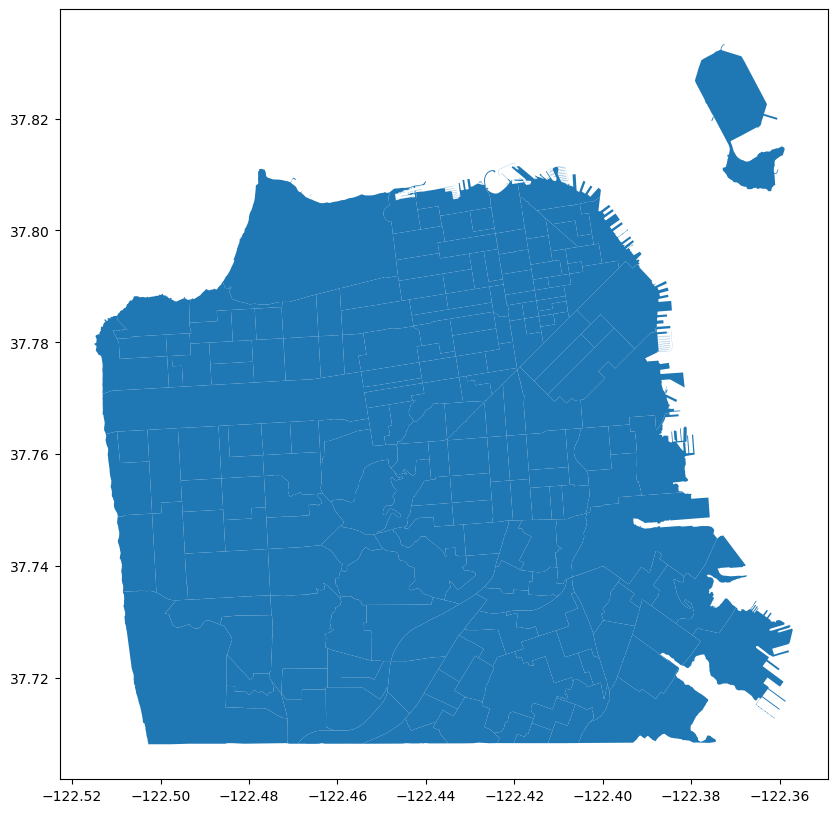

In [43]:
# plot it
poverty_tracts.plot(figsize=(12,10))

In [44]:
# create a FIPS column before merging
poverty_tracts['FIPS']=poverty_tracts['geoid']

In [45]:
poverty_tracts.head()

,shape_area,nhood,tractce10,geoid,shape_len,geometry,FIPS
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341...",06075016400
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234...",06075016100
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244...",06075015900
3,3364564.73418,Japantown,015500,06075015500,12144.0167608,"MULTIPOLYGON (((-122.42469 37.78534, -122.4249...",06075015500
4,2515362.5151,Pacific Heights,015300,06075015300,6918.26802571,"MULTIPOLYGON (((-122.43492 37.78588, -122.4365...",06075015300


In [46]:
# create a new dataframe based on the join, tracts is spatial data so it must come first
poverty_map=poverty_tracts.merge(poverty,on="FIPS")
poverty_map.head(3)

,shape_area,nhood,tractce10,geoid,shape_len,geometry,FIPS,Poverty,Poverty_Pctl
0,3326589.16121,Hayes Valley,016400,06075016400,7589.67939621,"MULTIPOLYGON (((-122.43247 37.77376, -122.4341...",06075016400,7.8,5.80
1,3970258.84056,Western Addition,016100,06075016100,8525.8087554,"MULTIPOLYGON (((-122.42354 37.77967, -122.4234...",06075016100,57.9,90.05
2,3179072.0728,Western Addition,015900,06075015900,8000.96661904,"MULTIPOLYGON (((-122.42469 37.78534, -122.4244...",06075015900,27.7,50.01


<AxesSubplot: >

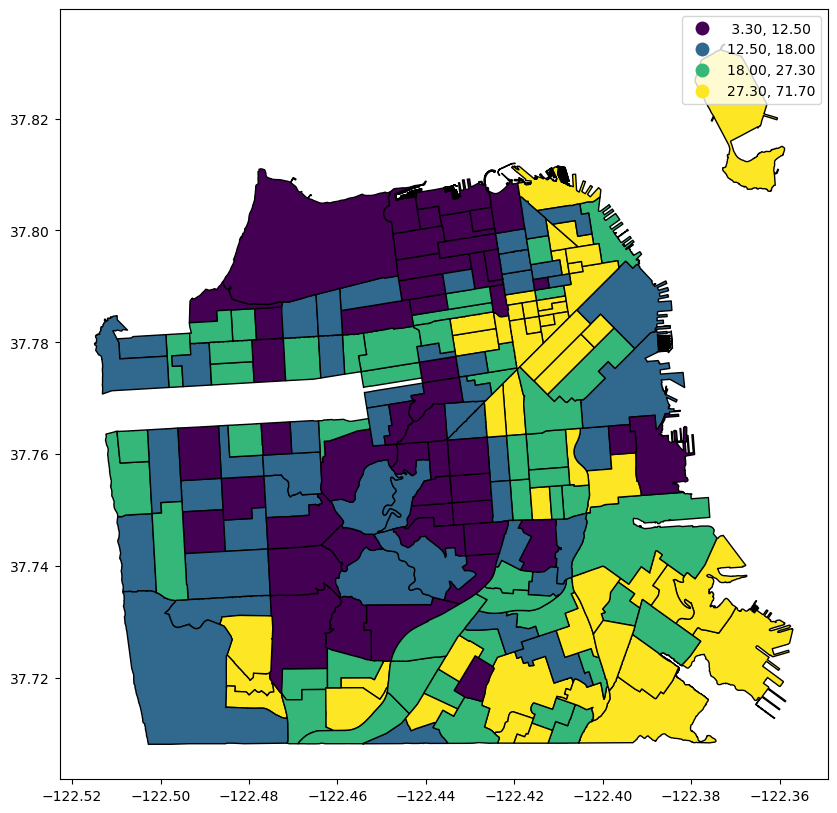

In [53]:
#generate a chloropleth map based on the merged dataset
poverty_map.plot(figsize=(12,10),
                 column='Poverty',
                 legend=True,
                 scheme='quantiles',
                 k=4,
                 edgecolor='k')